# Importing the data and preprocessing

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the dataset 
movies=pd.read_csv('/content/drive/MyDrive/Dataset/movies.csv')
ratings=pd.read_csv('/content/drive/MyDrive/Dataset/ratings.csv')

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Now removing the time stamps from the ratings dataset and the release year from the title for further use

In [ ]:
#There are 6 characters in the last of each title for the time stamp so removing them 
movies['title'] = movies['title'].str.strip().str[:-7]
#removing the | from the genre and replacing it by space
movies['genres']=movies['genres'].str.replace('|', ' ')
#now removing the time stamp from ratings 
ratings.drop('timestamp',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


Seeing the most occuring words in the movies names

In [ ]:
from collections import Counter

In [ ]:
# we will see the top 25 occuring characters 
most_occ_25=Counter(" ".join(movies['title']).split()).most_common(25)
df_most_occ_25 = pd.DataFrame(most_occ_25,columns=['Words', 'Occurence'])
print(df_most_occ_25)

      Words  Occurence
0       The       2219
1       the       1016
2        of       1009
3       and        362
4        in        275
5         A        234
6        to        209
7         a        184
8       Man        130
9         &        122
10        2        111
11       on        107
12  (a.k.a.         98
13       My         96
14     Love         92
15      for         90
16        I         86
17    Night         74
18      You         72
19     Last         72
20    Movie         71
21     Life         70
22     with         68
23       Me         67
24       de         65


Many of them are common words like the to and many others 

Preprocessing is done now

# Content based recommendations

Now we will make the collection of text documents into matrix of tokens<br>
We will use count vectorizer for it from sklearn

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure Animation Children Comedy Fantasy
1,2,Jumanji,Adventure Children Fantasy
2,3,Grumpier Old Men,Comedy Romance
3,4,Waiting to Exhale,Comedy Drama Romance
4,5,Father of the Bride Part II,Comedy


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#making an obejct of it 
cv=CountVectorizer()
# we have a token in the genres so we will now make tokens out of it 
genres_tokens=cv.fit_transform(movies['genres'].values)
#getting the features names 
genres_features=cv.get_feature_names_out()
genres_features


array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

In [ ]:
# now we have features so we will a data frame of it 
genres_tokens=pd.DataFrame(genres_tokens.toarray(),columns=genres_features.tolist())

In [ ]:
#converting to it to a single combined form
genres_tokens['combined']=genres_tokens.values.tolist()

In [ ]:
genres_tokens.head()

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,fi,...,musical,mystery,no,noir,romance,sci,thriller,war,western,combined
0,0,1,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


Now adding it to the original dataframe  by replacing it to genres

In [ ]:
movies['genres']=genres_tokens['combined']

In [ ]:
#seeing the final form 
movies.head()

,movieId,title,genres
0,1,Toy Story,"[0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
1,2,Jumanji,"[0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ..."
2,3,Grumpier Old Men,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,Waiting to Exhale,"[0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ..."
4,5,Father of the Bride Part II,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


Preprocessing is done

 Now we will do the functions

Content Based Recommender

## Getting the movies ID for similar one

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
test_cos = []

In [ ]:
def get_similar_movies_id(movie_id,top):# movie id is the selected movie ID and top represents the number of the movie you want to be recommended
  # we don't need the title for this beacuse we are selecting only with ID and genre 
  global movies
  global test_cos
  movies_id_genre=movies[['movieId','genres']]
  # now we are removing the movie for which we are ahving recommendations
  movies_id_genre=movies_id_genre[movies_id_genre['movieId']!=movie_id]
  # Saving distances between the selected movied and the other movies
  movies_id_genre['dist'] = movies_id_genre['genres'].apply(lambda x: cosine_similarity(np.array(x).reshape(1, -1), np.array(movies.loc[movies['movieId'] == movie_id]['genres'].values[0]).reshape(1, -1)))
  #Now we don't need our genres columns 
  movies_id_genre.drop('genres',axis=1,inplace=True)
  # The distance is in the form of list inside list so unpacking it 
  movies_id_genre = movies_id_genre.explode('dist').explode('dist')
  test_cos = movies_id_genre.sort_values(by=['dist'], ascending=False)['dist'].values
  # Now we have got our values so getting the recommendations
  return movies_id_genre.sort_values(by=['dist'], ascending=False)['movieId'].head(top).values# In this we are sorting it according to dist and getting the top value as the recpmmendation s


In [ ]:
pcon = []
print("Top 20 Recommendation of Iron Man (Content Based) : ")
for i in get_similar_movies_id(59315,20):
 pcon.append(movies[movies["movieId"] == i].values[:,1][0])
 print(movies[movies["movieId"] == i].values[:,1][0])

Top 20 Recommendation of Iron Man (Content Based) : 
Six-String Samurai
Spacehunter: Adventures in the Forbidden Zone
Fantastic Four
Rampage
Power Rangers
Power/Rangers
Star Wars: Episode I - The Phantom Menace
Bulletproof Monk
Superman
Lost in Space
Superman III
Superman IV: The Quest for Peace
Fantastic Four: Rise of the Silver Surfer
Assassin's Creed
Hulk
Terminator 3: Rise of the Machines
20,000 Leagues Under the Sea
Tron
Independence Day: Resurgence
Demolition Man


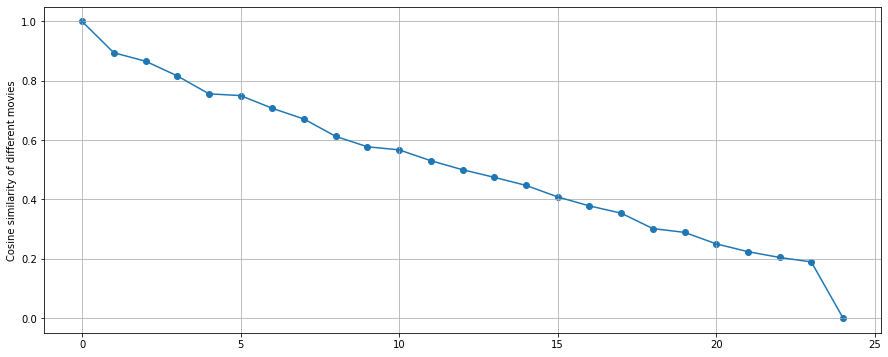

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(np.unique(test_cos)[-1::-1])
plt.scatter(range(len(np.unique(test_cos)[-1::-1])),np.unique(test_cos)[-1::-1])
plt.ylabel("Cosine similarity of different movies")
plt.grid()
plt.show()

## Making function for taking top 20 movies watched by user and then returning them any 5 realated to it

In [ ]:
def get_similar_top(user_id):
  #Now seeing all the movies all the movies watched by the USER 
  movies_watched_user=ratings[ratings['userId']==user_id]
  # Now filetring them with only rating above than 4.5 
  movies_watched_user=movies_watched_user[movies_watched_user['rating']>=4.5]
  #Now if these are more than 20 so selecting only 20 out of it 
  top_20_movies_user=(movies_watched_user.sort_values(by="rating", ascending=False).head(20))
  #making a new columns as watched movies so that they don't get recommended again to the user 
  top_20_movies_user['Already_watched_ID']=top_20_movies_user['movieId']
  # now we have our 20 watched movie so now getting top 5 recommendations according to it 
  top_20_movies_user['recommend_similar'] = top_20_movies_user['Already_watched_ID'].apply(lambda x: (get_similar_movies_id(x, 5)))
  #again checking for any same results
  recommendations = [x for x in np.concatenate(top_20_movies_user['recommend_similar'].values, axis=0).tolist() if x not in top_20_movies_user.Already_watched_ID.values.tolist()]
  return recommendations

## Now we have 100 movies recommended so sorting them according to top N and returning them

In [ ]:
def get_top_10_recommended(user_id,top):
  #getting the similar movies according to user id 
  similar_movies_user=get_similar_top(user_id)
  #Calculating mean rationing
  #Joining the ratings and movies by column movieID
  movie_data = pd.merge(ratings, movies, on='movieId')
  #  Now grouping all the movies according to ratings
  ratings_mean_count = pd.DataFrame(movie_data.groupby('movieId')['rating'].mean())
  # Now counting the ratings
  ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('movieId')['rating'].count())
  #Now we havr our movies so we will sort them according to rating and select only having rating more than 10 
  traings_mean_count=ratings_mean_count[ratings_mean_count['rating_counts']>10]
  #Now after sorting now selecting top N movies 
  return ratings_mean_count[ratings_mean_count.index.isin(similar_movies_user)].sort_values(by=['rating'], ascending=False).head(top)

In [ ]:
get_top_10_recommended(5,5)

,rating,rating_counts
movieId,,
2075,5.000000,1
391,4.500000,1
8484,4.500000,1
2329,4.217054,129
57669,4.158537,41


# Recommnedations using Neural Network

In [ ]:
#making a copy datframe of ratings 
df_ratings=ratings.copy(deep=True)

In [ ]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
from sklearn.preprocessing import LabelEncoder 
user_enc = LabelEncoder()
df_ratings['labeled_user_Id'] = user_enc.fit_transform(df_ratings['userId'].values)
n_users = df_ratings['labeled_user_Id'].nunique()

item_enc = LabelEncoder()
df_ratings['labeled_movie_Id'] = item_enc.fit_transform(df_ratings['movieId'].values)
n_movies = df_ratings['labeled_movie_Id'].nunique()

df_ratings["rating"] = df_ratings["rating"].values.astype(np.float32)
min_rating = min(df_ratings["rating"])
max_rating = max(df_ratings["rating"])

In [ ]:
df_ratings

,userId,movieId,rating,labeled_user_Id,labeled_movie_Id
0,1,1,4.0,0,0
1,1,3,4.0,0,2
2,1,6,4.0,0,5
3,1,47,5.0,0,43
4,1,50,5.0,0,46
...,...,...,...,...,...
100831,610,166534,4.0,609,9416
100832,610,168248,5.0,609,9443
100833,610,168250,5.0,609,9444
100834,610,168252,5.0,609,9445


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_ratings=df_ratings.sample(frac=1,random_state=42)
df_user_movie=df_ratings[["labeled_user_Id", "labeled_movie_Id"]].values
#For reducing the training time we will now normalize the values to 0 to 1 for target varaible 
df_ratings_normalized = df_ratings["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
#Now splitting ito 90 train and 10 test 
x_train, x_val, y_train, y_val = train_test_split(df_user_movie, df_ratings_normalized, test_size=0.1, random_state=42)

In [ ]:
print("The X train size is ",x_train.shape)
print("The X test size is ",x_val.shape)
print("The Y train size is ",y_train.shape)
print("The Y test size is ",y_val.shape)

The X train size is  (90752, 2)
The X test size is  (10084, 2)
The Y train size is  (90752,)
The Y test size is  (10084,)


In [ ]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


##Defining the NN model

In [ ]:
from tensorflow import keras
import tensorflow as tf

In [ ]:
from keras.models import Model
from keras.layers import Input, Reshape, Dot, Flatten, Lambda
from keras.layers import Concatenate, Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2

In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [ ]:
EMBEDDING_SIZE = 50

In [ ]:
def RecommenderV1(n_users, n_movies, n_factors):
    user = Input(shape=(1,))
    u = Embedding(n_users, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(user)
    u = Reshape((n_factors,))(u)
    
    movie = Input(shape=(1,))
    m = Embedding(n_movies, n_factors, embeddings_initializer='he_normal',
                  embeddings_regularizer=l2(1e-6))(movie)
    m = Reshape((n_factors,))(m)
    
    x = Dot(axes=1)([u, m])
    x= tf.nn.sigmoid(x)
    model = Model(inputs=[user, movie], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=keras.optimizers.Adam(lr=0.0005))
    return model

In [ ]:
modelv1 = RecommenderV1(n_users, n_movies, EMBEDDING_SIZE)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model is ready now training is done

In [ ]:
X_train_array = [x_train[:, 0], x_train[:, 1]]
X_test_array = [x_val[:, 0], x_val[:, 1]]

In [ ]:
X_train_array

[array([386, 589, 483, ..., 384, 176, 604]),
 array([5071, 5780, 2972, ...,  436, 7069,  723])]

In [ ]:
history = modelv1.fit(x=X_train_array, y=y_train, batch_size=64, epochs=15,
                    verbose=1, validation_data=(X_test_array , y_val))

Train on 90752 samples, validate on 10084 samples
Epoch 1/15
90752/90752 [==============================] - 6s 64us/sample - loss: 0.6902 - val_loss: 0.6747
Epoch 2/15
   64/90752 [..............................] - ETA: 12s - loss: 0.6683

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


90752/90752 [==============================] - 5s 58us/sample - loss: 0.6344 - val_loss: 0.6173
Epoch 3/15
90752/90752 [==============================] - 5s 59us/sample - loss: 0.6011 - val_loss: 0.6078
Epoch 4/15
90752/90752 [==============================] - 5s 59us/sample - loss: 0.5885 - val_loss: 0.6046
Epoch 5/15
90752/90752 [==============================] - 5s 58us/sample - loss: 0.5797 - val_loss: 0.6035
Epoch 6/15
90752/90752 [==============================] - 5s 57us/sample - loss: 0.5728 - val_loss: 0.6035
Epoch 7/15
90752/90752 [==============================] - 5s 57us/sample - loss: 0.5669 - val_loss: 0.6041
Epoch 8/15
90752/90752 [==============================] - 5s 57us/sample - loss: 0.5618 - val_loss: 0.6049
Epoch 9/15
90752/90752 [==============================] - 5s 57us/sample - loss: 0.5572 - val_loss: 0.6062
Epoch 10/15
90752/90752 [==============================] - 5s 57us/sample - loss: 0.5531 - val_loss: 0.6076
Epoch 11/15
90752/90752 [======================

In [ ]:
df_ratings.head()

,userId,movieId,rating,labeled_user_Id,labeled_movie_Id
67037,432,77866,4.5,431,7316
42175,288,474,3.0,287,412
93850,599,4351,3.0,598,3217
6187,42,2987,4.0,41,2248
12229,75,1610,4.0,74,1210


In [ ]:
user_id=10
# Searching for movies that user already watched
movies_watched_by_user = df_ratings[df_ratings.userId == user_id]
# Searching for movies that user haven't watched yet
labelled_movies_not_watched = df_ratings[
    ~df_ratings["labeled_movie_Id"].isin(movies_watched_by_user.labeled_movie_Id.values)
]["labeled_movie_Id"]

movies_not_watched = list(
    set(labelled_movies_not_watched).intersection(set(df_ratings['labeled_movie_Id'].keys()))
)


movies_not_watched = [[df_ratings['labeled_movie_Id'].get(x)] for x in movies_not_watched]

labbeled_user_id=df_ratings[df_ratings['userId']==user_id].labeled_user_Id.values
labbeled_user_id=np.unique(labbeled_user_id)
user_movie_array = np.hstack(
    ([labbeled_user_id] * len(movies_not_watched), movies_not_watched)
)
pred_array = [user_movie_array[:, 0], user_movie_array[:, 1]]
# Predicting ratings for movies
recommend_movie_ratings = modelv1.predict(pred_array).flatten()
# Sorting predicted ratings and taking top 20
top_ratings_indices = recommend_movie_ratings.argsort()[-20:][::-1]
# Getting the actual IDs for movies

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [ ]:
def get_top_recommended_nn(user_id,top):
  movies_watched_by_user = df_ratings[df_ratings.userId == user_id]
  # Searching for movies that user haven't watched yet
  labelled_movies_not_watched = df_ratings[
      ~df_ratings["labeled_movie_Id"].isin(movies_watched_by_user.labeled_movie_Id.values)
  ]["labeled_movie_Id"]

  movies_not_watched = list(
      set(labelled_movies_not_watched).intersection(set(df_ratings['labeled_movie_Id'].keys()))
  )
  movies_not_watched = [[df_ratings['labeled_movie_Id'].get(x)] for x in movies_not_watched]

  labbeled_user_id=df_ratings[df_ratings['userId']==user_id].labeled_user_Id.values
  labbeled_user_id=np.unique(labbeled_user_id)
  user_movie_array = np.hstack(
      ([labbeled_user_id] * len(movies_not_watched), movies_not_watched)
  )
  pred_array = [user_movie_array[:, 0], user_movie_array[:, 1]]
  # Predicting ratings for movies
  recommend_movie_ratings = modelv1.predict(pred_array).flatten()
  #Taking out the top n recommndations 
  top_ratings_indices = recommend_movie_ratings.argsort()[-(top):][::-1]
  #Now reverse Labelling them 
  top_movie_nn_ids=item_enc.inverse_transform(top_ratings_indices)
  #Returning it 
  return top_movie_nn_ids

In [ ]:
get_top_recommended_nn(10,20)

array([  1594,   4973,   1659,  75803, 139717,   5665,   2210,   4794,
        31700,   1621,   5610, 157865, 135518,   2888,    290,   7218,
         2059,  62970,   8136, 124273])

In [ ]:
print("The movie recommendations for the user ID " + str(user_id) + " (Neural Network)")
for i in get_top_recommended_nn(10,20):
  print(movies[movies['movieId']==i].values[:,1][0])

The movie recommendations for the user ID 10 (Neural Network)
In the Company of Men
Amelie (Fabuleux destin d'Amélie Poulain, Le)
Hurricane Streets
Our Family Wedding
10 Cent Pistol
Knockaround Guys
Sabotage
Opera
Because of Winn-Dixie
Soul Food
Banger Sisters, The
Ratchet & Clank
Self/less
Drive Me Crazy
Once Were Warriors
Ox-Bow Incident, The
Parent Trap, The
Tin Man
Indestructible Man
Kevin Smith: Too Fat For 40


# K-NN Model

Creating a pivot matrix with the columns as the User ID's and the rows as the Movie ID's

In [ ]:
ratings

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [ ]:
pivot_mat = ratings.pivot(index='movieId',columns='userId',values='rating')
pivot_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,NaN,4.0,NaN,4.5,NaN,NaN,NaN,...,4.0,NaN,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,NaN,NaN,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,4.0,NaN,5.0,3.5,NaN,NaN,2.0,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


As there are NaN values in the pivot matrix, we use hte fill na function to change the NaN to 0.

In [ ]:
pivot_mat.fillna(0,inplace=True)
pivot_mat.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pivot_mat.shape

(9724, 610)

In [ ]:
pivt = pivot_mat.copy()

Calculating the arrays that stores info on number of votes casted by the user on different movies and also the number of users that casted votes on different movies.

In [ ]:
vote_movie = [[],[]]
user_votes = [[],[]]
sh = pivot_mat.shape
for i in range(sh[0]):
  r,c = np.unique(pivot_mat.values[i],return_counts=True)
  user_votes[0].append(np.sum(c[1:]))
  user_votes[1].append(pivot_mat.index[i])
for i in range(sh[1]):
  r,c = np.unique(pivot_mat.values[:,i],return_counts=True)
  vote_movie[0].append(np.sum(c[1:]))
  vote_movie[1].append(i+1)

In [ ]:
vote_movie = np.array(vote_movie).T
user_votes = np.array(user_votes).T

Plotting the previously created arrays and then setting the threshold on the data to refine the data.

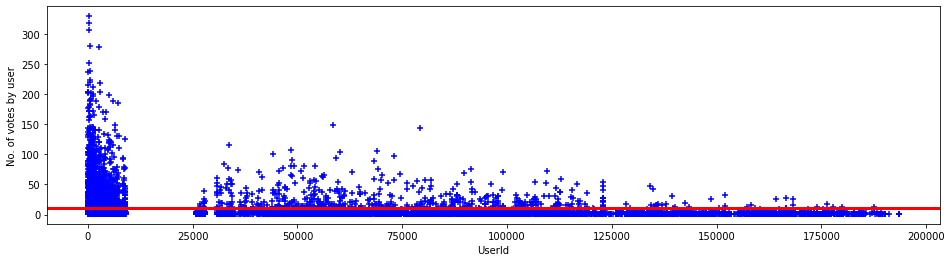

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(user_votes[:,1],user_votes[:,0],color='blue',marker="+")
plt.axhline(y=10,color='r',lw=3)
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()


In [ ]:
pivot_mat = pivot_mat.loc[user_votes[:,1][user_votes[:,0] > 10],:]

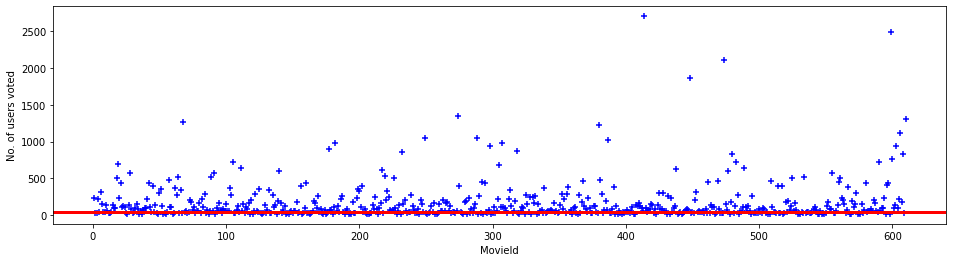

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(vote_movie[:,1],vote_movie[:,0],color='blue',marker="+")
plt.axhline(y=50,color='r',lw=3)
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
pivot_mat = pivot_mat.loc[:,vote_movie[:,1][vote_movie[:,0] > 50]]

The final datset is : 

In [ ]:
pivot_mat

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
177765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
zc = 0
for i in range(pivot_mat.shape[0]):
  for j in range(pivot_mat.shape[1]):
    if pivot_mat.iloc[i,j] == 0:
      zc+=1

In [ ]:
print("The number of total entries in the pivot matrix are : ", pivot_mat.shape[0]*pivot_mat.shape[1])
print("The number of zero entries in the pivot matrix are : ", zc)
print("The number of non-zero entries in the pivot matrix are : ", pivot_mat.shape[0]*pivot_mat.shape[1] - zc)

The number of total entries in the pivot matrix are :  801738
The number of zero entries in the pivot matrix are :  728845
The number of non-zero entries in the pivot matrix are :  72893


Now as we can see that the maximum readings in the matrix have 0 values, this means converting this matrix into an Compressed Sparse Row (CSR) Matrix would be better for performance on the further operations on this matrix

In [ ]:
from scipy.sparse import csr_matrix
csr_data = csr_matrix(pivot_mat.values)
pivot_mat.reset_index(inplace=True)

Now we need to fit the K-Nearest Neighbour model with the dataset for the recoomendation task.

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def knn_reccomendation(movie_name,n_movies_to_reccomend):
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = pivot_mat[pivot_mat['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[1:]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = pivot_mat.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df
    else:
        return "No movies found. Please check your input"

In [ ]:
print("The reccomendation of Iron Man (KNN Model) : ")
for i in knn_reccomendation('Iron Man',20).values[:,0]:
  print(i)

The reccomendation of Iron Man (KNN Model) : 
Avengers, The
Dark Knight, The
WALL·E
Iron Man 2
Avatar
Batman Begins
Star Trek
Watchmen
Guardians of the Galaxy
Up
Inception
Kung Fu Panda
District 9
Sherlock Holmes
X-Men: First Class
Pirates of the Caribbean: At World's End
Thor
Pirates of the Caribbean: Dead Man's Chest
Pirates of the Caribbean: The Curse of the Black Pearl
Star Wars: Episode III - Revenge of the Sith


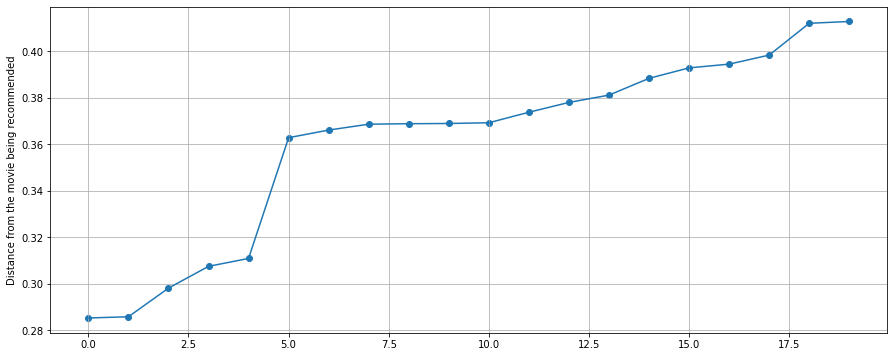

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(knn_reccomendation('Iron Man',20).values[:,1])
plt.scatter(range(len(knn_reccomendation('Iron Man',20).values[:,1])),knn_reccomendation('Iron Man',20).values[:,1])
plt.ylabel("Distance from the movie being recommended")
plt.grid()
plt.show()

In [ ]:
class knn_recommendations:
  def fit(self,csr_data):
    self.knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
    self.knn.fit(csr_data)
  
  def recommendations(self, movie_name,n_movies_to_reccomend):
    movie_list = movies[movies['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = pivot_mat[pivot_mat['movieId'] == movie_idx].index[0]
        distances , indices = self.knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[1:]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = pivot_mat.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df['Title'].values
    else:
        return "No movies found. Please check your input"

In [ ]:
knn_rec_model=knn_recommendations()
knn_rec_model.fit(csr_data)

In [ ]:
knn_rec_model.recommendations('Iron Man',3)

array(['Avengers, The', 'Dark Knight, The', 'WALL·E'], dtype=object)

In [ ]:
import joblib
 
# Save the model as a pickle in a file
joblib.dump(knn_rec_model,'knnmodel.pkl')

['knnmodel.pkl']

# Genre Based Recommendation

In [ ]:
test_gen = []
pgen = []
def dist_rec(movie_name,rec):
  global test_gen
  global pgen
  arr = np.array(movies[movies['title'] == movie_name].values[0][2])
  mov = movies[movies['title'] != movie_name].values
  dis = []
  for i in mov:
    dis.append(np.sqrt((np.sum((np.array(i[2]) - arr)**2)))) # similar to the K-means clustering decision.
  print("The Recommendations for " + movie_name + " are (Genre Based) :")
  test_gen = dis
  for i in range(rec):
    pgen.append(mov[:,1][np.argmin(dis)])
    print(mov[:,1][np.argmin(dis)])
    dis[np.argmin(dis)] = 9999

In [ ]:
dist_rec("Iron Man",20)

The Recommendations for Iron Man are (Genre Based) :
Waterworld
Star Wars: Episode IV - A New Hope
Stargate
Demolition Man
Star Wars: Episode V - The Empire Strikes Back
Star Wars: Episode VI - Return of the Jedi
Star Trek III: The Search for Spock
Lost in Space
Rocketeer, The
Tron
Six-String Samurai
Logan's Run
Star Wars: Episode I - The Phantom Menace
Superman
Superman III
Superman IV: The Quest for Peace
Mad Max
Mad Max Beyond Thunderdome
X-Men
Godzilla 2000 (Gojira ni-sen mireniamu)


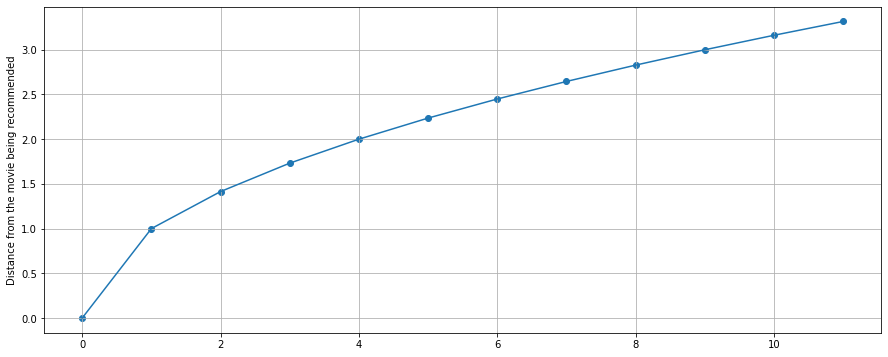

In [ ]:
plt.figure(figsize=[15,6])
plt.plot(np.unique(sorted(test_gen))[:-1])
plt.scatter(range(len(np.unique(sorted(test_gen))[:-1])),np.unique(sorted(test_gen))[:-1])
plt.ylabel("Distance from the movie being recommended")
plt.grid()
plt.show()

# Performance Analysis

In [ ]:
def quality_rat(rarr,model_name):
  global movies
  avgr = []
  for i in rarr:
    mid = movies[movies['title'] == i].index[0]
    avgr.append(np.sum(np.unique(pivt.iloc[mid,:].values,return_counts=True)[1][1:] * np.unique(pivt.iloc[mid,:].values,return_counts=True)[0][1:])/np.sum(np.unique(pivt.iloc[mid,:].values,return_counts=True)[1][1:]))
  plt.figure(figsize=[20,6])
  plt.bar(range(len(rarr)), avgr)
  plt.ylabel("Average Movie Ratings")
  plt.title(model_name)
  plt.show()
  return np.mean(avgr)

## Content Based

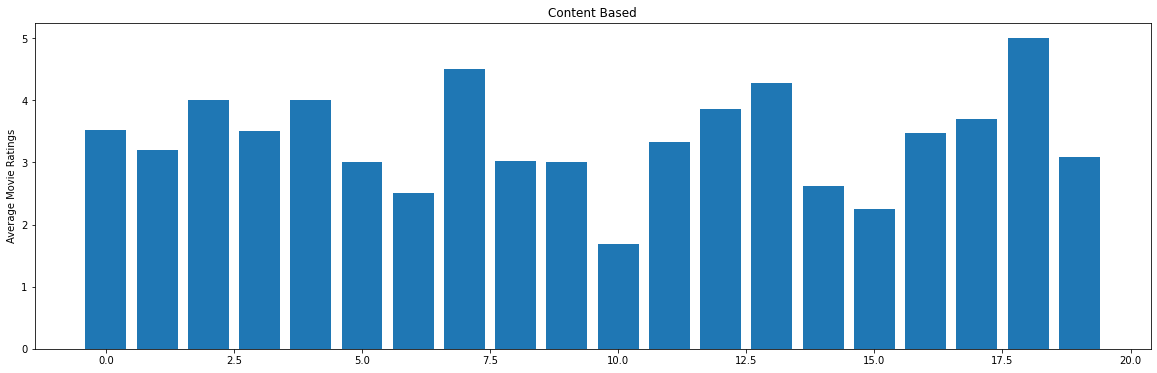

In [ ]:
perf_con = quality_rat(pcon,"Content Based")

## KNN Model

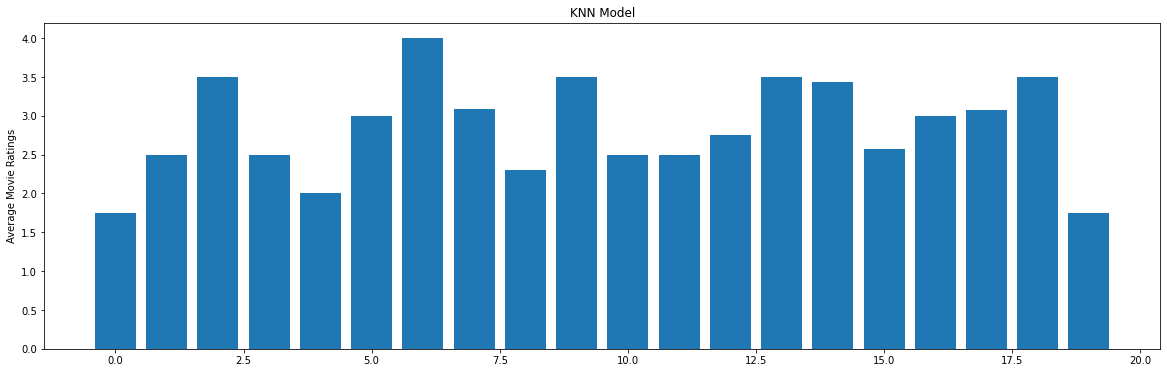

In [ ]:
perf_knn = quality_rat(knn_reccomendation('Iron Man',20).values[:,0],"KNN Model")

## Genre Based Model

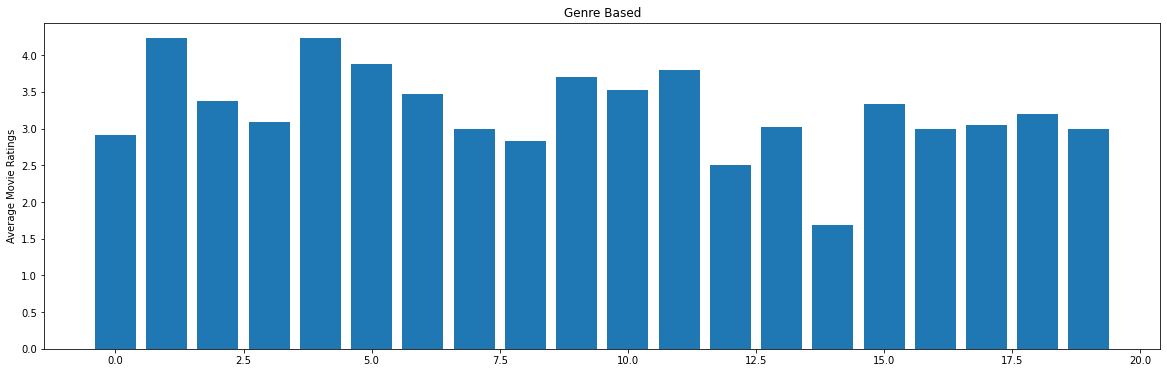

In [ ]:
perf_gn = quality_rat(pgen,"Genre Based")

## Best Model

In [ ]:
models = ["Content Based","KNN Model","Genre Based"]
bperf = np.argmax([perf_con,perf_knn,perf_gn])
print("The best performing model for the recommendation of Iron Man is " + models[bperf])
print("The average rating of the recommendation is",[perf_con,perf_knn,perf_gn][bperf])

The best performing model for the recommendation of Iron Man is Content Based
The average rating of the recommendation is 3.3775314728448627
